# AER615 Project 1

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# initial parameters, in SI units
weight = 2325 * 4.44822
density = 1.225
area = 170 * 0.092903
stall_velocity = 28.8089
max_velocity = 60.7044
wingspan = 35 * 0.3048
viscosity = 1.460e-5

max_cl = (2 * weight) / (density * area * stall_velocity**2)
min_cl = (2 * weight) / (density * area * max_velocity**2)

lift_coefficients = np.linspace(max_cl, min_cl, num=30).tolist()

velocities = [np.sqrt((2 * weight) / (density * area * cl)) for cl in lift_coefficients]

dynamic_pressures = [0.5 * density * (velocity**2) for velocity in velocities]

induced_drags = [((weight / wingspan)**2) * (1 / (q * 3.1415)) for q in dynamic_pressures]

In [3]:
# section reynolds number
section_chords = [4.36, 5.3, 5.64]

section_reynolds = [
    [(velocity * chord)/viscosity for velocity in velocities] for chord in section_chords
]

section_re_average = [sum(section)/len(section) for section in section_reynolds]

for re in section_re_average:
    print(re/10e6)

1.1727942251042243
1.4256443562046763
1.5171007866027122


In [4]:
# wing profile drag
# assuming overall plane c_l = c_i,l
section_cd = [
    0.026, 
    0.0205, 
    0.018, 
    0.017, 
    0.016, 
    0.0145, 
    0.0140, 
    0.0135, 
    0.0125, 
    0.0125, 
    0.0115, 
    0.011, 
    0.0105, 
    0.0095, 
    0.0085, 
    0.0055, 
    0.0053, 
    0.0050, 
    0.0048, 
    0.0047, 
    0.0046,
    0.0045,
    0.0045,
    0.0044,
    0.0044,
    0.0043,
    0.0043,
    0.0042,
    0.0042,
    0.0041
]

profile_drags = [dynamic_pressures[i] * 2 * cd * area for i, cd in enumerate(section_cd)]

In [5]:
# fuselage drags
cylinder_length = 7.25424
cylinder_area = (90452 / (12**2)) * 0.092903

cylinder_re = [(velocity * cylinder_length)/viscosity for velocity in velocities]
cylinder_cf = [0.074 / (re**0.2) for re in cylinder_re]

fuselage_drag = [0.5 * density * (velocities[i]**2) * cylinder_area * cf for i, cf in enumerate(cylinder_cf)]

In [6]:
# empennage drags
emp_area = 4.016
emp_drag = [0.5 * density * (velocities[i]**2) * emp_area * section_cd[i] for i in range(len(lift_coefficients))]

In [7]:
# landing gear drag
tire1_width = 0.57 * 0.3048
tire1_diam = 1.38 * 0.3048
tire1_ref = tire1_width * tire1_diam

tire2_width = 0.45 * 0.3048
tire2_diam = 1.17 * 0.3048
tire2_ref = tire2_width * tire2_diam

# from supplemental
tire_cd = 0.12

tire_drag = [q * tire_cd * (2*tire1_ref + tire2_ref) for q in dynamic_pressures]

In [8]:
data = pd.DataFrame(
    data = {
        'Lift Coefficient': lift_coefficients, 
        'Velocity': velocities, 
        'Dynamic Pressure': dynamic_pressures, 
        'Induced Drag': induced_drags,
        'Profile Drag': profile_drags,
        'Fuselage Drag': fuselage_drag,
        'Empennage Drag': emp_drag,
        'Landing Gear Drag': tire_drag
    }
)

data_list = list(data)
for section in ['Lift Coefficient', 'Velocity', 'Dynamic Pressure']:
    data_list.remove(section)

data['Total Drag'] = data[data_list].sum(axis=1)

data

,Lift Coefficient,Velocity,Dynamic Pressure,Induced Drag,Profile Drag,Fuselage Drag,Empennage Drag,Landing Gear Drag,Total Drag
0,1.288164,28.808900,508.346041,588.512793,417.485550,81.343609,53.079460,11.899477,1152.320889
1,1.253749,29.201623,522.300040,572.789824,338.206987,83.350458,42.999918,12.226115,1049.573302
2,1.219334,29.610857,537.041731,557.066856,305.343862,85.464778,38.821673,12.571192,999.268360
3,1.184918,30.037792,552.639746,541.343887,296.756126,87.695608,37.729821,12.936314,976.461755
4,1.150503,30.483744,569.170933,525.620918,287.654618,90.053040,36.572647,13.323279,953.224503
5,1.116088,30.950167,586.721615,509.897949,268.725417,92.548379,34.165973,13.734110,919.071828
6,1.081673,31.438676,605.389103,494.174981,267.714128,95.194329,34.037397,14.171082,905.291916
7,1.047258,31.951072,625.283499,478.452012,266.636372,98.005220,33.900370,14.636775,891.630749
8,1.012843,32.489367,646.529870,462.729043,255.274399,100.997279,32.455799,15.134114,866.590635
9,0.978427,33.055819,669.270879,447.006074,264.253408,104.188953,33.597398,15.666441,864.712274


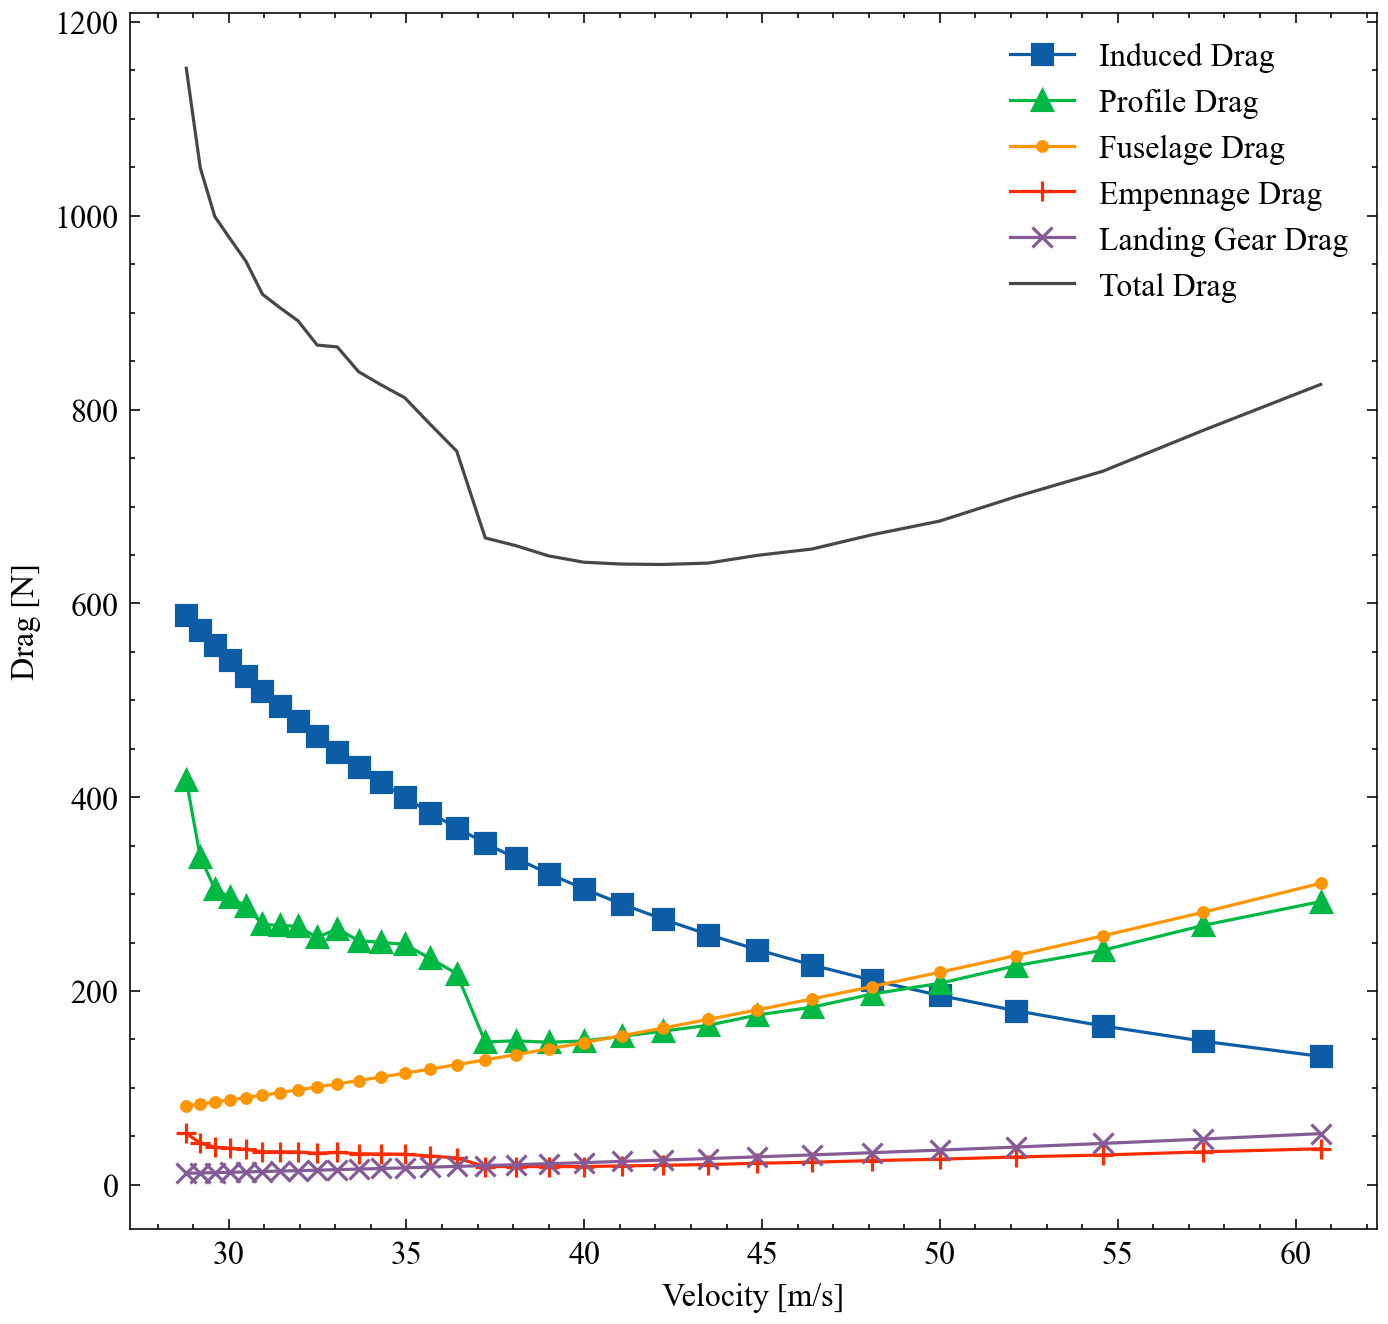

In [9]:
plt.figure(dpi=230, figsize=(7,7))
plt.style.use(['science', 'no-latex'])

plt.plot(velocities, induced_drags, label='Induced Drag', marker='s')
plt.plot(velocities, profile_drags, label='Profile Drag', marker='^')
plt.plot(velocities, fuselage_drag, label='Fuselage Drag', marker='.')
plt.plot(velocities, emp_drag, label='Empennage Drag', marker='+')
plt.plot(velocities, tire_drag, label='Landing Gear Drag', marker = 'x')
plt.plot(velocities, data['Total Drag'], label='Total Drag')

plt.xlabel('Velocity [m/s]')
plt.ylabel('Drag [N]')

plt.legend()
plt.show()

In [10]:
# overall drag coefficient
total_drag = list(data['Total Drag'])

drag_coefficients = [drag/(dynamic_pressures[i] * area) for i, drag in enumerate(total_drag)]

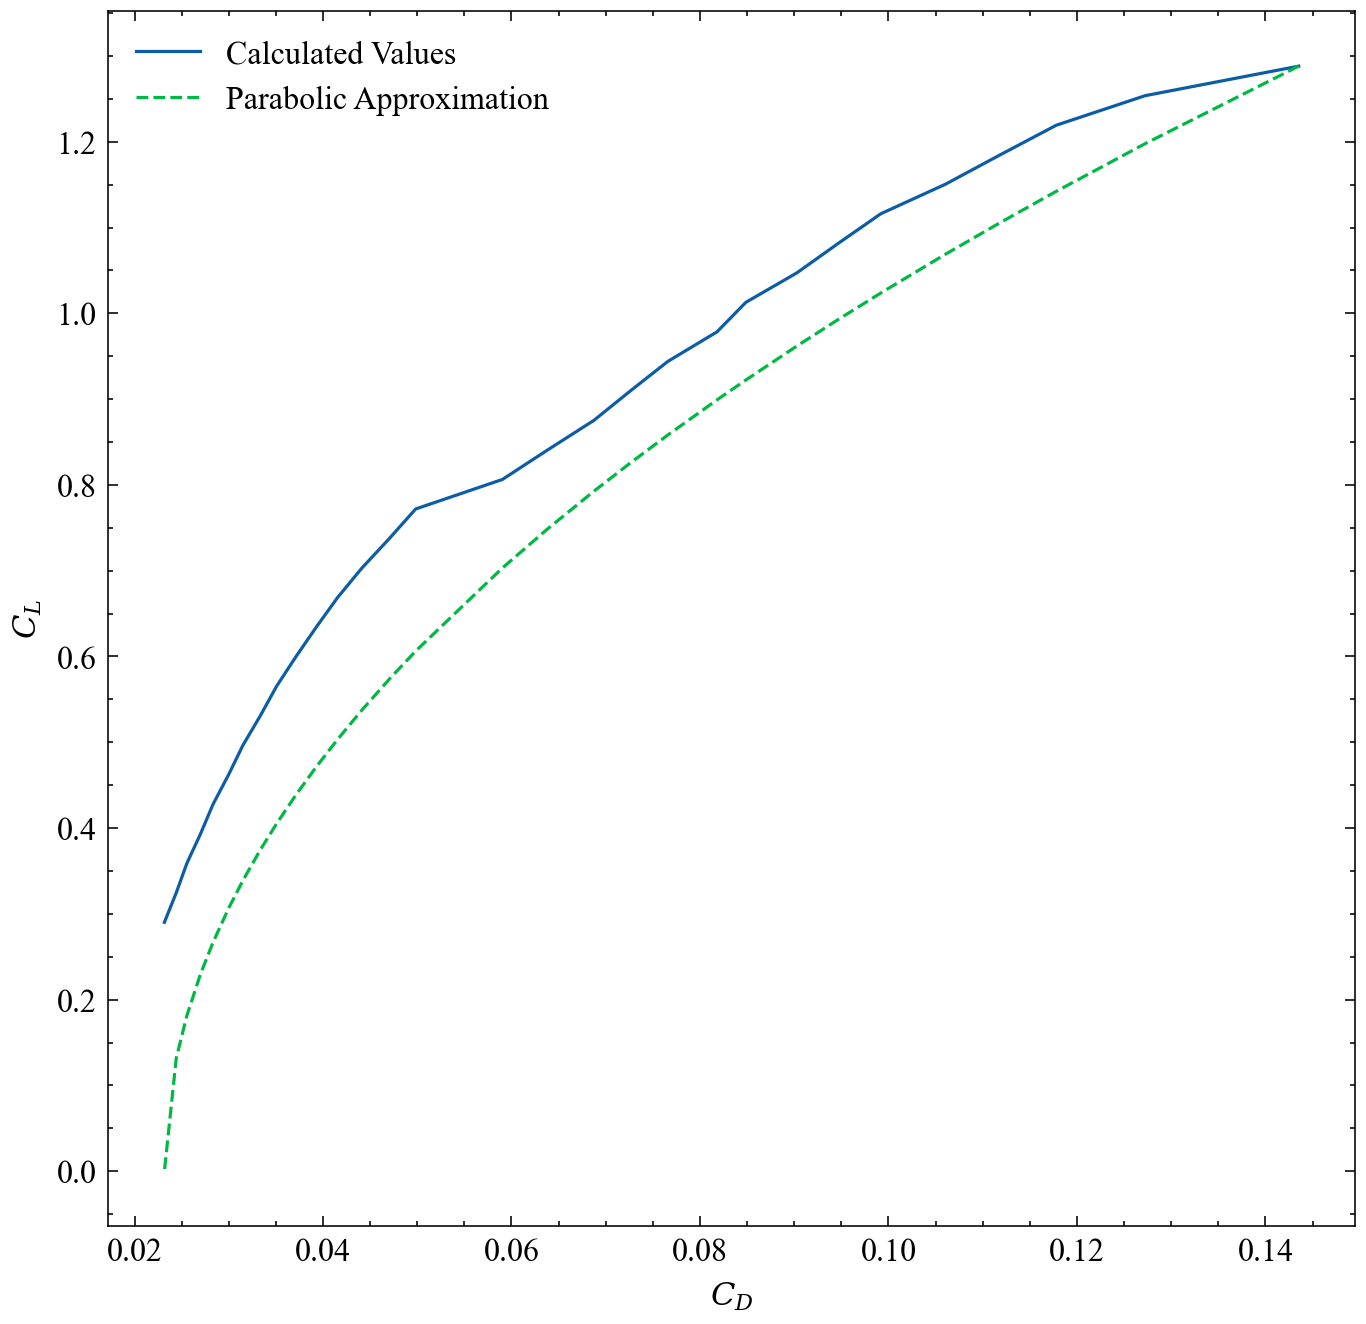

In [11]:
c_do = drag_coefficients[-1]
c_dcalc = drag_coefficients[0]
c_lcalc = lift_coefficients[0]

aspect_ratio = wingspan**2 / area
oswald = ((c_lcalc**2)/(np.pi * aspect_ratio)/(c_dcalc - c_do))

cl_parabolic = [np.sqrt((cd - c_do)*(np.pi * oswald * aspect_ratio)) for cd in drag_coefficients]

plt.figure(dpi=230, figsize=(7,7))
plt.style.use(['science', 'no-latex'])

plt.plot(drag_coefficients, lift_coefficients, label='Calculated Values')
plt.plot(drag_coefficients, cl_parabolic, '--', label='Parabolic Approximation')

plt.xlabel('$C_D$')
plt.ylabel('$C_L$')

plt.legend()
plt.show()

## Altitude Analysis

In [12]:
# 10,000 ft
density_10k = 0.9093
viscosity_10k = 1.87068e-5
sigma_10k = density_10k/density

max_cl_10k = (2 * weight) / (density_10k * area * (stall_velocity / np.sqrt(sigma_10k))**2)
min_cl_10k = (2 * weight) / (density_10k * area * (max_velocity / np.sqrt(sigma_10k))**2)

lift_coefficients_10k = np.linspace(max_cl_10k, min_cl_10k, num=30).tolist()

velocities_10k = [np.sqrt((2 * weight) / (density_10k * area * cl)) for cl in lift_coefficients_10k]

dynamic_pressures_10k = [0.5 * density_10k * (velocity**2) for velocity in velocities_10k]

induced_drags_10k = [((weight / wingspan)**2) * (1 / (q * 3.1415)) for q in dynamic_pressures_10k]

profile_drags_10k = [dynamic_pressures_10k[i] * 2 * cd * area for i, cd in enumerate(section_cd)]

# fuselage drags
cylinder_re_10k = [(velocity * cylinder_length)/viscosity_10k for velocity in velocities_10k]
cylinder_cf_10k = [0.074 / (re**0.2) for re in cylinder_re_10k]

fuselage_drag_10k = [dynamic_pressures_10k[i] * cylinder_area * cf for i, cf in enumerate(cylinder_cf_10k)]

# empennage drags
emp_area = 4.016
emp_drag_10k = [dynamic_pressures_10k[i] * emp_area * section_cd[i] for i in range(len(lift_coefficients_10k))]

# landing gear drag
tire_drag_10k = [q * tire_cd * (2*tire1_ref + tire2_ref) for q in dynamic_pressures_10k]

total_drag10k = [
    sum([
        induced_drags_10k[i], 
        profile_drags_10k[i], 
        fuselage_drag_10k[i], 
        emp_drag_10k[i], 
        tire_drag_10k[i]
    ]) for i in range(len(lift_coefficients_10k))
]

In [13]:
data_10k = pd.DataFrame(
    data = {
        'Lift Coefficient': lift_coefficients_10k, 
        'Velocity': velocities_10k, 
        'Dynamic Pressure': dynamic_pressures_10k, 
        'Induced Drag': induced_drags_10k,
        'Profile Drag': profile_drags_10k,
        'Fuselage Drag': fuselage_drag_10k,
        'Empennage Drag': emp_drag_10k,
        'Landing Gear Drag': tire_drag_10k
    }
)

data_list = list(data_10k)
for section in ['Lift Coefficient', 'Velocity', 'Dynamic Pressure']:
    data_list.remove(section)

data_10k['Total Drag'] = data_10k[data_list].sum(axis=1)

data_10k

,Lift Coefficient,Velocity,Dynamic Pressure,Induced Drag,Profile Drag,Fuselage Drag,Empennage Drag,Landing Gear Drag,Total Drag
0,1.288164,33.438064,508.346041,588.512793,417.485550,82.967858,53.079460,11.899477,1153.945138
1,1.253749,33.893891,522.300040,572.789824,338.206987,85.014779,42.999918,12.226115,1051.237623
2,1.219334,34.368883,537.041731,557.066856,305.343862,87.171317,38.821673,12.571192,1000.974899
3,1.184918,34.864421,552.639746,541.343887,296.756126,89.446691,37.729821,12.936314,978.212839
4,1.150503,35.382031,569.170933,525.620918,287.654618,91.851196,36.572647,13.323279,955.022659
5,1.116088,35.923401,586.721615,509.897949,268.725417,94.396362,34.165973,13.734110,920.919811
6,1.081673,36.490407,605.389103,494.174981,267.714128,97.095145,34.037397,14.171082,907.192733
7,1.047258,37.085137,625.283499,478.452012,266.636372,99.962164,33.900370,14.636775,893.587693
8,1.012843,37.709928,646.529870,462.729043,255.274399,103.013967,32.455799,15.134114,868.607323
9,0.978427,38.367400,669.270879,447.006074,264.253408,106.269371,33.597398,15.666441,866.792693


In [14]:
# 15,000 ft
density_15k = 0.7779
viscosity_15k = 2.130536e-5
sigma_15k = density_15k/density

max_cl_15k = (2 * weight) / (density_15k * area * (stall_velocity / np.sqrt(sigma_15k))**2)
min_cl_15k = (2 * weight) / (density_15k * area * (max_velocity / np.sqrt(sigma_15k))**2)

lift_coefficients_15k = np.linspace(max_cl_15k, min_cl_15k, num=30).tolist()

velocities_15k = [np.sqrt((2 * weight) / (density_15k * area * cl)) for cl in lift_coefficients_15k]

dynamic_pressures_15k = [0.5 * density_15k * (velocity**2) for velocity in velocities_15k]

induced_drags_15k = [((weight / wingspan)**2) * (1 / (q * 3.1415)) for q in dynamic_pressures_15k]

profile_drags_15k = [dynamic_pressures_15k[i] * 2 * cd * area for i, cd in enumerate(section_cd)]

# fuselage drags
cylinder_re_15k = [(velocity * cylinder_length)/viscosity_15k for velocity in velocities_15k]
cylinder_cf_15k = [0.074 / (re**0.2) for re in cylinder_re_15k]

fuselage_drag_15k = [dynamic_pressures_15k[i] * cylinder_area * cf for i, cf in enumerate(cylinder_cf_15k)]

# empennage drags
emp_area = 4.016
emp_drag_15k = [dynamic_pressures_15k[i] * emp_area * section_cd[i] for i in range(len(lift_coefficients_15k))]

# landing gear drag
tire_drag_15k = [q * tire_cd * (2*tire1_ref + tire2_ref) for q in dynamic_pressures_15k]

total_drag15k = [
    sum([
        induced_drags_15k[i], 
        profile_drags_15k[i], 
        fuselage_drag_15k[i], 
        emp_drag_15k[i], 
        tire_drag_15k[i]
    ]) for i in range(len(lift_coefficients_15k))
]

In [15]:
data_15k = pd.DataFrame(
    data = {
        'Lift Coefficient': lift_coefficients_15k, 
        'Velocity': velocities_15k, 
        'Dynamic Pressure': dynamic_pressures_15k, 
        'Induced Drag': induced_drags_15k,
        'Profile Drag': profile_drags_15k,
        'Fuselage Drag': fuselage_drag_15k,
        'Empennage Drag': emp_drag_15k,
        'Landing Gear Drag': tire_drag_15k
    }
)

data_list = list(data_15k)
for section in ['Lift Coefficient', 'Velocity', 'Dynamic Pressure']:
    data_list.remove(section)

data_15k['Total Drag'] = data_15k[data_list].sum(axis=1)

data_15k

,Lift Coefficient,Velocity,Dynamic Pressure,Induced Drag,Profile Drag,Fuselage Drag,Empennage Drag,Landing Gear Drag,Total Drag
0,1.288164,36.152042,508.346041,588.512793,417.485550,83.835780,53.079460,11.899477,1154.813060
1,1.253749,36.644866,522.300040,572.789824,338.206987,85.904114,42.999918,12.226115,1052.126958
2,1.219334,37.158411,537.041731,557.066856,305.343862,88.083211,38.821673,12.571192,1001.886793
3,1.184918,37.694169,552.639746,541.343887,296.756126,90.382388,37.729821,12.936314,979.148536
4,1.150503,38.253790,569.170933,525.620918,287.654618,92.812047,36.572647,13.323279,955.983510
5,1.116088,38.839100,586.721615,509.897949,268.725417,95.383837,34.165973,13.734110,921.907286
6,1.081673,39.452126,605.389103,494.174981,267.714128,98.110852,34.037397,14.171082,908.208440
7,1.047258,40.095127,625.283499,478.452012,266.636372,101.007862,33.900370,14.636775,894.633392
8,1.012843,40.770629,646.529870,462.729043,255.274399,104.091590,32.455799,15.134114,869.684947
9,0.978427,41.481464,669.270879,447.006074,264.253408,107.381050,33.597398,15.666441,867.904371


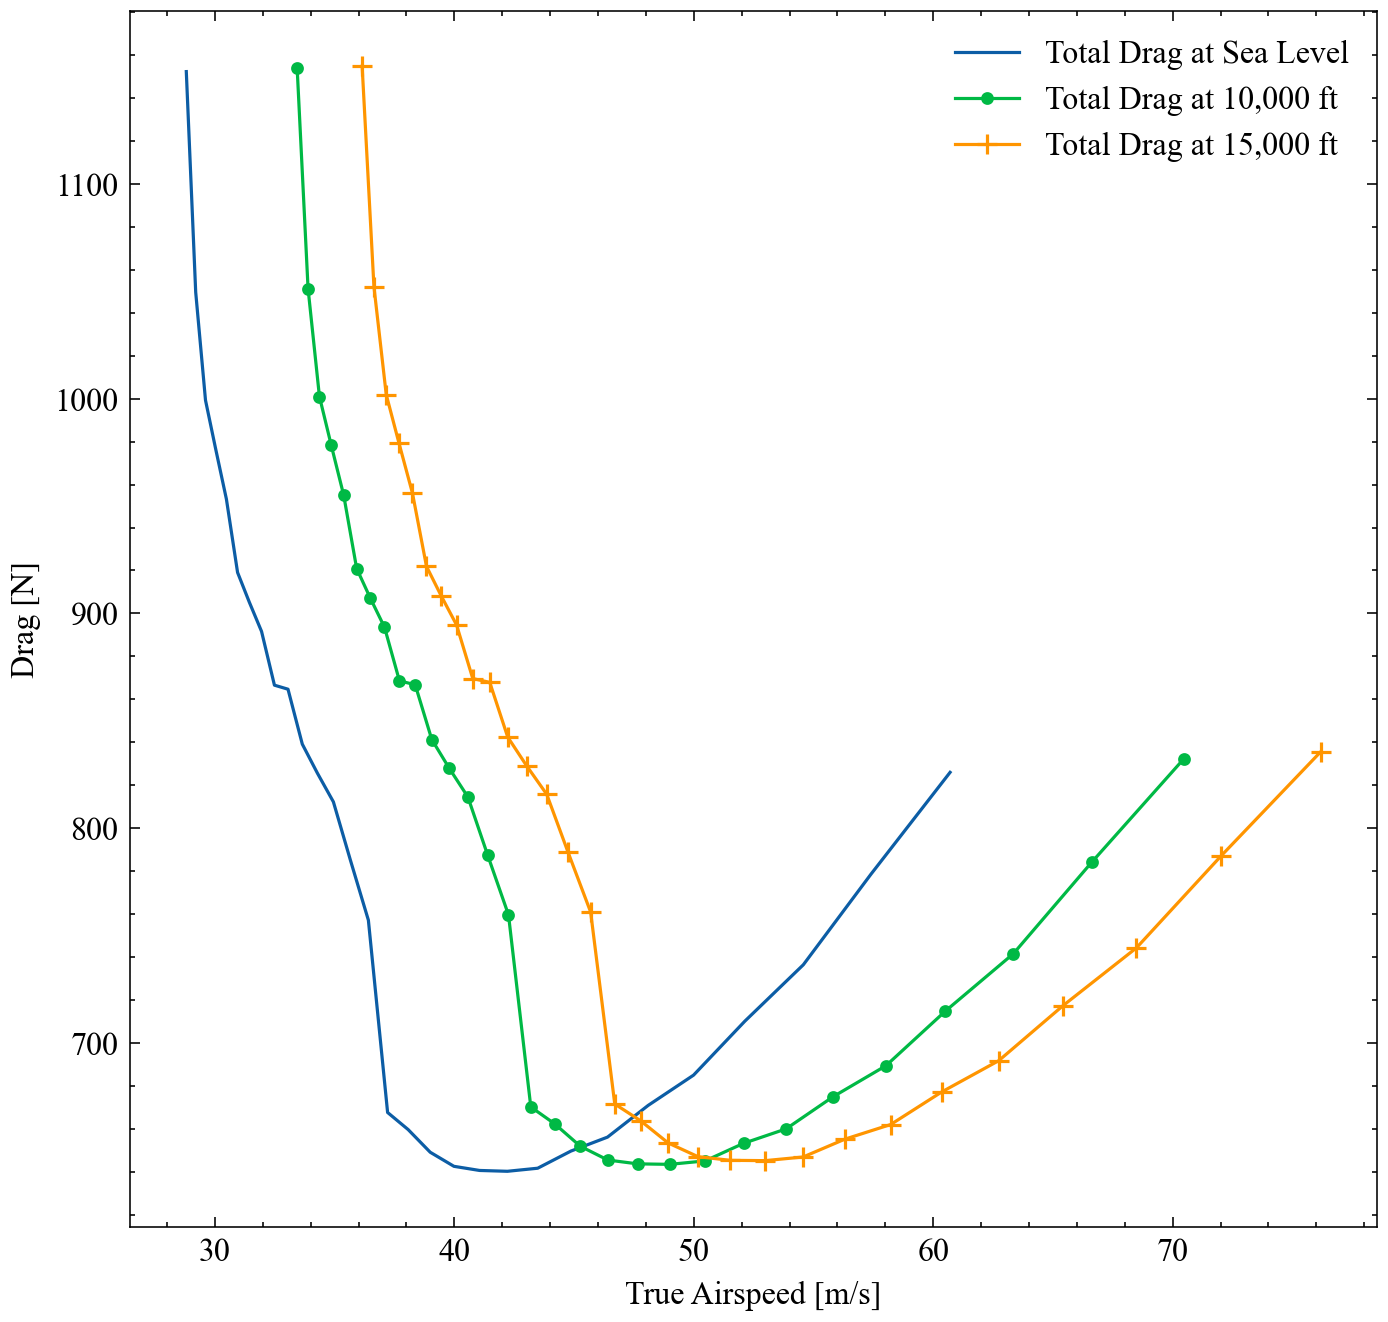

In [16]:
plt.figure(dpi=230, figsize=(7,7))
plt.style.use(['science', 'no-latex'])

plt.plot(velocities, data['Total Drag'], label='Total Drag at Sea Level')
plt.plot(velocities_10k, total_drag10k, label='Total Drag at 10,000 ft', marker='.')
plt.plot(velocities_15k, total_drag15k, label='Total Drag at 15,000 ft', marker='+')

plt.xlabel('True Airspeed [m/s]')
plt.ylabel('Drag [N]')

plt.legend()
plt.show()

## Weight Analysis

In [17]:
velocity_list = []
drag_list = []

for w in [2325, 2000, 1800]:
    weight = w * 4.44822

    max_cl = (2 * weight) / (density * area * stall_velocity**2)
    min_cl = (2 * weight) / (density * area * max_velocity**2)

    lift_coefficients = np.linspace(max_cl, min_cl, num=30).tolist()

    velocities = [np.sqrt((2 * weight) / (density * area * cl)) for cl in lift_coefficients]

    dynamic_pressures = [0.5 * density * (velocity**2) for velocity in velocities]

    induced_drags = [((weight / wingspan)**2) * (1 / (q * 3.1415)) for q in dynamic_pressures]

    profile_drags = [dynamic_pressures[i] * 2 * cd * area for i, cd in enumerate(section_cd)]

    # fuselage drags
    cylinder_re = [(velocity * cylinder_length)/viscosity for velocity in velocities]
    cylinder_cf = [0.074 / (re**0.2) for re in cylinder_re]

    fuselage_drag = [0.5 * density * (velocities[i]**2) * cylinder_area * cf for i, cf in enumerate(cylinder_cf)]

    # empennage drags
    emp_area = 4.016
    emp_drag = [0.5 * density * (velocities[i]**2) * emp_area * section_cd[i] for i in range(len(lift_coefficients))]
    
    # landing gear drag
    tire_drag = [q * tire_cd * (2*tire1_ref + tire2_ref) for q in dynamic_pressures]

    velocity_list.append(velocities)
    
    total_drag = [
        sum([
            induced_drags[i], 
            profile_drags[i], 
            fuselage_drag[i], 
            emp_drag[i], 
            tire_drag[i]
        ]) for i in range(len(lift_coefficients))
    ]
    drag_list.append(total_drag)

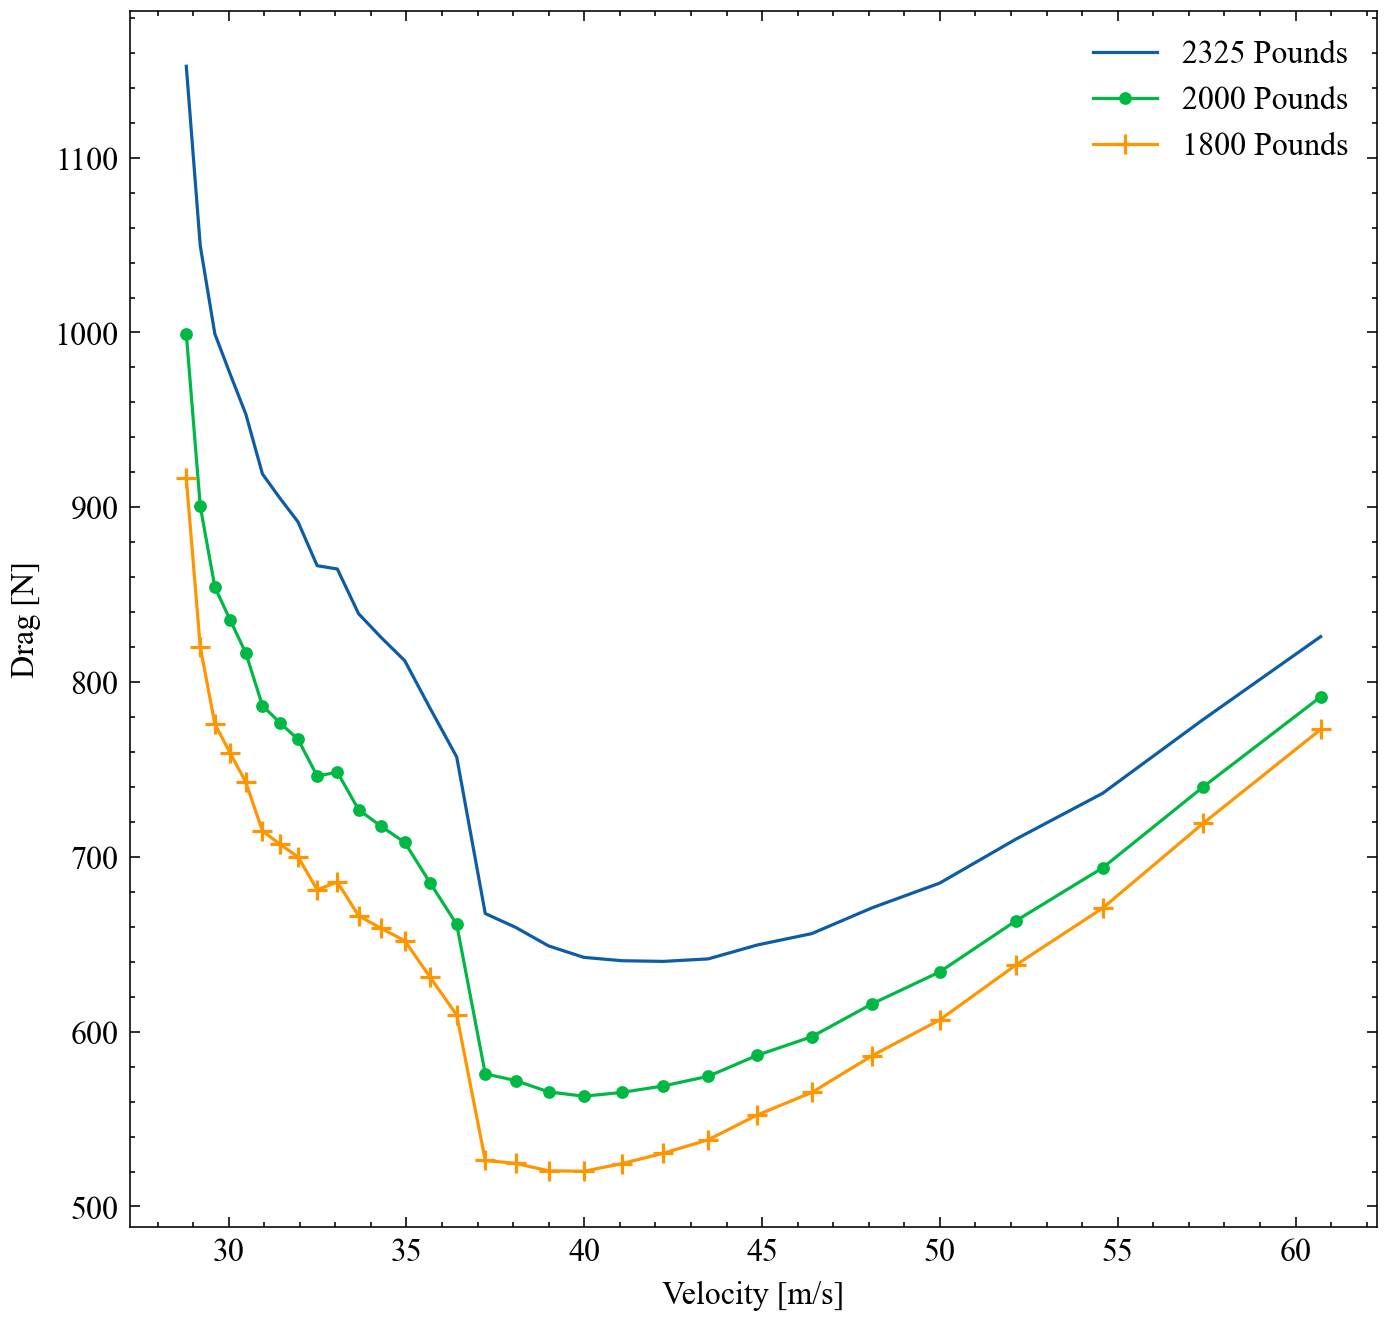

In [18]:
plt.figure(dpi=230, figsize=(7,7))
plt.style.use(['science', 'no-latex'])

plt.plot(velocity_list[0], drag_list[0], label='2325 Pounds')
plt.plot(velocity_list[1], drag_list[1], label='2000 Pounds', marker='.')
plt.plot(velocity_list[2], drag_list[2], label='1800 Pounds', marker='+')

plt.xlabel('Velocity [m/s]')
plt.ylabel('Drag [N]')

plt.legend()
plt.show()